<a href="https://colab.research.google.com/github/goulartsursula/IntroPython-BetheBloch/blob/main/Estrutura%20da%20Materia%202/StefanBoltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y = (3.5980035014471743 +- 0.05410585652812484)x +( -25.99396530334016 +- 0.4253811064136509)


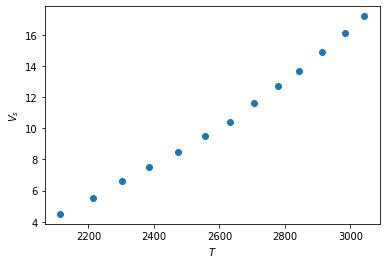

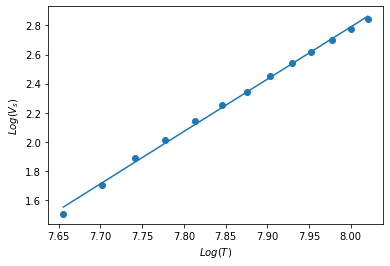

,vl,il,vs,r,t,r/rref,R(T),erro_vl,erro_il,erro_vs,erro_r,erro_r/rref,erro_t
0,5.01,1.87,4.5,2.679144,2112.900445,9.175152,2.679144,0.05505,0.0874,0.0525,0.128632,0.440520,97.893226
1,5.51,1.96,5.5,2.811224,2213.418029,9.627481,2.811224,0.05755,0.0892,0.0575,0.131266,0.449539,99.897641
2,6.00,2.05,6.6,2.926829,2301.397312,10.023388,2.926829,0.06000,0.0910,0.0630,0.133179,0.456091,101.353555
3,6.50,2.14,7.5,3.037383,2385.532707,10.401997,3.037383,0.06250,0.0928,0.0675,0.134914,0.462033,102.674010
4,7.00,2.22,8.5,3.153153,2473.637712,10.798470,3.153153,0.06500,0.0944,0.0725,0.137240,0.469999,104.444200
5,7.50,2.30,9.5,3.260870,2555.613672,11.167362,3.260870,0.06750,0.0960,0.0775,0.139234,0.476829,105.961930
6,8.00,2.38,10.4,3.361345,2632.078644,11.511454,3.361345,0.07000,0.0976,0.0820,0.140946,0.482693,107.265036
7,8.51,2.46,11.6,3.459350,2706.663922,11.847088,3.459350,0.07255,0.0992,0.0880,0.142582,0.488296,108.510181
8,8.99,2.53,12.7,3.553360,2778.208892,12.169040,3.553360,0.07495,0.1006,0.0935,0.144364,0.494397,109.866030
9,9.50,2.61,13.7,3.639847,2844.028572,12.465229,3.639847,0.07750,0.1022,0.0985,0.145586,0.498582,110.796104


In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

dados = pd.read_csv('Dados_StefanBoltzmann.dat', delimiter = '\t')
tref = 296.2
rref = 0.292
a = 4.5e-3

dados['r'] = dados['vl']/dados['il']
dados['t'] = tref + ((dados['r'] - rref)/(a * rref))
dados['r/rref'] = dados['r']/rref
dados['R(T)'] = rref*(1+a*(dados['t']-tref))
dados['erro_vl'] = 0.005 * dados['vl'] + 0.03
dados['erro_il'] = 0.02 * dados['il'] + 0.05
dados['erro_vs'] = 0.005 * dados['vs'] + 0.03
dados['erro_r'] = dados['r'] * (np.sqrt(np.power(dados['erro_vl']/dados['vl'],2) + np.power(dados['erro_il']/dados['il'],2)))
dados['erro_r/rref'] = dados['erro_r']/rref
dados['erro_t'] = dados['erro_r']/(a*rref)

#Ajuste linear
x = np.log(dados['t'])
y = np.log(dados['vs'])

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

#Gráfico ajuste
plt.scatter(dados['t'], dados['vs'])
plt.ylabel('$V_s$')
plt.xlabel('$T$')
plt.show()

plt.scatter(np.log(dados['t']), np.log(dados['vs']))
plt.plot(np.log(dados['t']), np.log(dados['t']) * 3.5980035014471743 - 25.99396530334016)
plt.ylabel('$Log(V_s)$')
plt.xlabel('$Log(T)$')

plt.show()
dados.head(13)